
## **Stage 3	기초 EDA 및 분석 - <font color="blue">WHAT</font> 무엇이 연체 정도에 영향을 줄까?**

<img src='http://drive.google.com/uc?export=view&id=1UZWDPjCLi18NVyqzBws0l3vUlE25ozn1' /><br>


## **INTRO**
지난 스테이지 **Stage 2. 문제 및 모델링의 이해 - 신용카드 연체를 예측하기 위해 필요한 것** 에서 변수들의 기술적 통계을 확인하고, train 및 test 데이터셋을 구성하여 로지스틱 회귀 모델을 적용해보았습니다 😀  

이번 스테이지는 **추론적 통계 분석으로 변수들을 확인**할 예정입니다. 😎

그럼, 여러 변수를 분석하고, 새로운 모델들과 만날 준비가 되셨을까요? 함께 가시죠! 🚙

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브를 사용하는 경우

PATH = "/content/drive/MyDrive/데이크루6기_보초석분/data/"

train = pd.read_csv(PATH+'train.csv') # pd.read_csv(PATH) -> PATH에 로컬 저장 경로 입력 ex) C:/home/data/train.csv
test = pd.read_csv(PATH+'test.csv')
submission = pd.read_csv(PATH+'sample_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. 변수의 추론적 통계 분석(상관관계, 회귀분석 등)**
```
index: 고유한 인덱스
gender: 성별
car: 차 소유 여부
reality: 부동산 소유 여부
child_num: 자녀 수
income_total: 총 수입
income_type: 소득 유형
edu_type: 교육 수준
family_type: 가족 유형
house_type: 주택 유형
DAYS_BIRTH: 출생일로부터의 날짜
DAYS_EMPLOYED: 고용일로부터의 날짜
FLAG_MOBIL: 모바일 전화 소유 여부
work_phone: 업무용 전화 소유 여부
phone: 전화 소유 여부
email: 이메일 소유 여부
occyp_type: 직업 유형
family_size: 가족 규모
begin_month: 신용카드 발급일로부터의 월 수
credit: 신용도 (타겟 변수)
```

상관관계란 두 변수 간의 **선형적인 관계**를 나타내는 것입니다.     
두 사람이 같이 춤을 추는 것처럼, 하나의 변수가 변할 때 다른 변수가 어떻게 움직이는지를 관찰하는 것입니다. 만약 두 사람이 완벽하게 동기화되어 춤을 추면, 그들 사이의 상관관계는 매우 강하다고 할 수 있습니다.

**수치형 변수**들 간의 상관관계는 보통 **피어슨 상관 계수**를 사용하여 측정됩니다. 이 값은 -1에서 1 사이를 가집니다.
- **1**에 가까울수록 **완벽한 양의 상관관계**를 가지며,
- **-1**에 가까울수록 **완벽한 음의 상관관계**를 가집니다.
- **0**은 두 변수 간에 **상관관계가 없음**을 나타냅니다.

다음 세션에서는 **수치형 변수**들만 고려하여 상관관계를 분석하겠습니다. 포함할 변수들은 다음과 같습니다.
- **'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit'**.

### 2. 상관관계 분석
상관관계 시각화에 사용할 seaborn 과 matplotlib 라이브러리를 미리 임포트해줍시다.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

상관관계를 확인할 변수를 cont_col로 선언해줍니다.

In [ ]:
cont_col = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit']

'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'는 음수 값으로 설정되어 있지만, 분석 결과를 이해하기 쉽도록 양수로 변환합니다.

In [ ]:
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,-13899,-4709,-6.0
1,-11380,-1540,-5.0
2,-19087,-4434,-22.0
3,-15088,-2092,-37.0
4,-15037,-2105,-26.0


In [ ]:
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']] = train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].abs()
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,13899,4709,6.0
1,11380,1540,5.0
2,19087,4434,22.0
3,15088,2092,37.0
4,15037,2105,26.0


##### **Inst.**
판다스의 corr() 함수로 변수 간의 상관관계를 확인할 수 있습니다.

corr() 함수는 데이터프레임의 열 간 상관 관계를 계산하여 상관 행렬(Correlation Matrix)을 반환하는 함수입니다.     

corr() 함수는 기본적으로 Pearson 상관 계수를 사용하여 상관 행렬을 계산해요.    이외에도, Kendall 상관 계수나 Spearman 상관 계수 등 다양한 상관 계수를 사용할 수 있어요.    
또한, DataFrame의 행과 열의 이름을 사용하여 특정 열 간의 상관 관계만 계산할 수도 있답니다.

상관 행렬은 데이터프레임에서 변수 간의 관계를 파악하거나, 변수 선택에 대한 기준을 제공하는 등 다양한 분석에 활용되니, 유용하겠죠?

이제, 변수들의 상관관계를 확인해볼까요?    

##### **Hint.**
판다스의 corr() 함수는 아래 파라미터를 가지고 있어요.   
```python
corr(method='pearson', min_periods=1)
```
- method : {'pearson', 'kendall', 'spearman'}, 기본값은 'pearson'입니다. 상관 계수를 계산할 때 사용할 상관 계수의 종류를 선택합니다. 'pearson'은 피어슨 상관 계수를 사용하며, 'kendall'은 켄달의 타우 상관 계수, 'spearman'은 스피어맨 상관 계수를 사용합니다.
- min_periods : int, 기본값은 1입니다. 상관 계수를 계산할 때 사용할 최소 데이터 개수를 지정합니다. 이 값보다 적은 데이터가 있는 경우, 해당 열은 NaN으로 반환됩니다.

In [ ]:
# corr() 함수로 연속형 변수들의 상관관계를 구해보세요!


##### **Solution**
train[cont_col].corr()로 cont_col 변수에 저장된 연속형 변수들 간의 상관관계를 계산할 수 있어요.   
이때, 데이터 정규화는 자동으로 이루어지니 걱정하지 않으셔도 됩니다.

In [ ]:
# corr() 함수로 연속형 변수들의 상관관계를 구해보세요!
train[cont_col].corr()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
child_num,1.000000,0.032186,-0.332816,-0.229974,0.890530,0.007229,0.004081
income_total,0.032186,1.000000,-0.064155,-0.165863,0.023839,0.018047,0.008555
DAYS_BIRTH,-0.332816,-0.064155,1.000000,0.625053,-0.298108,0.057306,0.025187
DAYS_EMPLOYED,-0.229974,-0.165863,0.625053,1.000000,-0.224379,-0.005188,-0.003055
family_size,0.890530,0.023839,-0.298108,-0.224379,1.000000,0.023032,0.008227
begin_month,0.007229,0.018047,0.057306,-0.005188,0.023032,1.000000,0.147477
credit,0.004081,0.008555,0.025187,-0.003055,0.008227,0.147477,1.000000


여러 개씩 보니 감이 잘 안잡히네요 🤔    
신용도(credit) 변수에 대한 상관관계를 확인해볼까요?    
판다스의 sort_values() 함수와 lambda 함수를 사용하여 절대값 내림차순으로 확인해봅시다!

In [ ]:
train[cont_col].corr()['credit'].sort_values(key=lambda x: abs(x), ascending=False)

credit           1.000000
begin_month      0.147477
DAYS_BIRTH       0.025187
income_total     0.008555
family_size      0.008227
child_num        0.004081
DAYS_EMPLOYED   -0.003055
Name: credit, dtype: float64

begin_month와 약한 양의 상관관계를 보여주고 있군요!

seaborn 라이브러리의 heatmap을 사용하여 시각적으로 상관관계를 표현할 수 있습니다.

<Axes: >

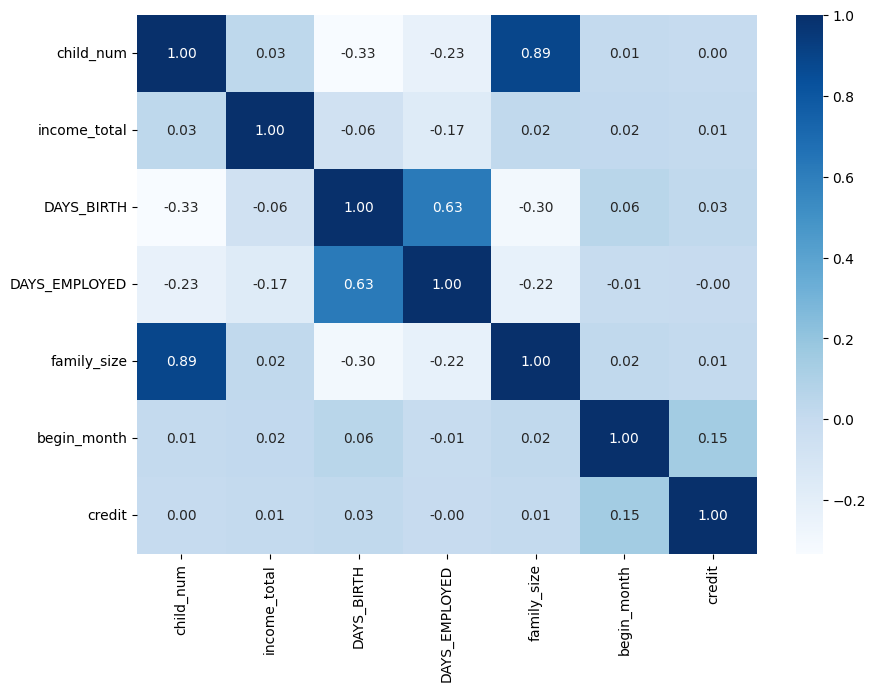

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(train[cont_col].corr(), annot=True, fmt=".2f", cmap="Blues")

- child_num과 family_size는 매우 높은 양의 상관관계를 가지고 있습니다(0.89).
    - 자녀 수가 많을수록 가족 규모도 커진다는 것을 나타냅니다.
- DAYS_BIRTH와 DAYS_EMPLOYED는 음의 상관관계를 가지고 있습니다(0.63). 이는 나이가 많을수록 (즉, 출생일로부터의 일수가 많을수록) 고용된 기간이 길어진다는 것을 나타냅니다.
    - 일반적으로 나이가 많을수록 오래 일하는 것을 나타냅니다.
- begin_month와 credit는 약한 양의 상관관계를 가지고 있습니다(0.15).
    - 신용카드가 발급된지 오래될수록 신용 등급이 높아진다는 것을 나타낼 수 있습니다.

### 3. t-검정
때로는 우리가 두 그룹의 평균 값을 비교하고 싶을 때가 있습니다. 예를 들어, 두 개의 서로 다른 방식으로 학습한 학생들의 시험 점수📝를 비교하고 싶을 수 있습니다. **t-검정**은 바로 이런 상황에서 두 그룹의 평균이 통계적으로 유의미하게 다른지를 판단하는 데 사용됩니다.

t-검정은 마치 두 선수의 스포츠 능력🥇을 비교하는 것과 유사합니다. 두 선수가 경기장에서 동일한 조건 하에서 경기를 할 때, 어느 선수의 능력이 더 뛰어난지를 판단하기 위해 그들의 성적을 비교하게 됩니다. 여기서 **귀무 가설**은 두 선수의 능력이 동일하다는 것이며, **대립 가설**은 그렇지 않다는 것입니다.

분석하기 전에 값을 범주형 변수의 값을 0과 1로 변환합니다.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 인코더 생성
onehot_encoder = OneHotEncoder()

# 인코딩할 열 선택
columns_to_onehot = ['gender', 'car', 'reality']

# 선택한 열에 대해 원핫 인코딩 수행
for column in columns_to_onehot:
    # train 데이터에 대해서는 fit_transform 수행
    train[column] = onehot_encoder.fit_transform(train[column].values.reshape(-1, 1)).toarray()
    print(onehot_encoder.categories_)

[array(['F', 'M'], dtype=object)]
[array(['N', 'Y'], dtype=object)]
[array(['N', 'Y'], dtype=object)]


##### **Inst.**

다음으로, 'car' 변수를 사용하여 차를 소유한 그룹과 그렇지 않은 그룹의 신용도 차이를 비교하겠습니다.    
이를 위해 두 집단의 **평균 신용도**를 비교하는 **t-검정**을 사용하겠습니다.    
이때 **귀무 가설**은 두 집단의 평균 신용도가 동일하다는 것이고, **대립 가설**은 두 집단의 평균 신용도가 다르다는 것입니다.

먼저, 'car' 변수를 이용해 데이터를 두 그룹으로 나누겠습니다.  

##### **Hint.**
statsmodels의 ttest_ind 함수는 두 독립 표본 간의 평균 차이를 검정하기 위한 함수입니다.

```python
ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', value=0)
```

- **x1, x2**:
   - 비교하고자 하는 두 독립 표본 그룹의 데이터입니다.

- **alternative** (기본값: `'two-sided'`):
   - 사용할 대립 가설을 지정합니다.
     - `'two-sided'`: 두 그룹의 평균이 같지 않다는 가설.
     - `'larger'`: `x1`의 평균이 `x2`의 평균보다 크다는 가설.
     - `'smaller'`: `x1`의 평균이 `x2`의 평균보다 작다는 가설.

- **usevar** (기본값: `'pooled'`):
   - 두 그룹의 분산 추정 방법을 지정합니다.
     - `'pooled'`: 두 그룹의 분산이 같다고 가정하고 풀링된 분산을 사용합니다.
     - `'unequal'`: 두 그룹의 분산이 다르다고 가정하고 웰치의 수정된 자유도를 사용합니다.

- **value** (기본값: `0`):
   - 귀무 가설 하에서 두 그룹 간의 평균 차이를 나타냅니다.


In [ ]:
import statsmodels.stats.weightstats as sm

# 1. 두 그룹으로 데이터셋을 나눕니다.

# 2. statsmodels 사용하여 t-test를 진행합니다.


##### **Solution**
sm.ttest_ind(group_A, group_B)로 t-검정을 계산할 수 있어요.   

'car' 컬럼의 값에 따라 train 데이터프레임을 두 그룹으로 분리합니다.
- group_A: 'car' 값이 1인 (즉, 차를 소유하고 있는) 그룹의 'credit' 컬럼 값
- group_B: 'car' 값이 0인 (즉, 차를 소유하고 있지 않은) 그룹의 'credit' 컬럼 값

ttest_ind 함수를 사용하여 두 그룹 (group_A와 group_B)의 평균 간에 통계적으로 유의미한 차이가 있는지 독립 표본 t-검정을 수행하고, 다음 값을 반환합니다.
- t_stat: t-통계량 값
- p_value: 해당 t-통계량에 대한 p-값

In [ ]:
import statsmodels.stats.weightstats as sm

# 1. 두 그룹으로 데이터셋을 나눕니다.
group_A = train[train['car'] == 1]['credit']
group_B = train[train['car'] == 0]['credit']

# 2. statsmodels 사용하여 t-test를 진행합니다.
t_stat, p_value, _ = sm.ttest_ind(group_A, group_B)

t_stat, p_value

(-1.2623107559491669, 0.206848115404349)

차를 소유한 그룹(A 그룹)과 그렇지 않은 그룹(B 그룹)의 평균 신용도를 비교한 t-검정의 결과는 다음과 같습니다:

t-statistic: 1.26
p-value: 0.21
p-value가 0.05보다 크므로, 우리는 귀무 가설을 기각할 수 없습니다. 이는 차를 소유한 그룹과 그렇지 않은 그룹 간의 평균 신용도에 통계적으로 유의미한 차이가 없다는 것을 의미합니다. 즉, 이 데이터에 따르면 차 소유 여부는 신용도에 영향을 미치지 않는 것으로 보입니다.

이 결과는 통계적 유의성과 P-Values에 대한 설명을 제공합니다. p-value는 귀무 가설이 참일 경우, 관찰된 통계치와 같거나 더 극단적인 통계치가 관찰될 확률을 의미합니다. 일반적으로 p-value가 0.05 미만일 경우, 결과는 통계적으로 유의하다고 판단합니다. 이는 귀무 가설을 기각하고 대립 가설을 채택한다는 의미입니다. 하지만 이 경우, p-value가 0.05보다 크므로, 귀무 가설을 기각할 수 없습니다. 이는 차 소유 여부와 신용도 사이에 통계적으로 유의미한 관계가 없다는 것을 의미합니다.

다른 변수에 대해서도 진행하고, 결과를 시각화해볼까요?    
다음 시각화는 이해를 돕기 위한 과정이니, 시각화 결과를 해석하는 것에 집중해주세요!

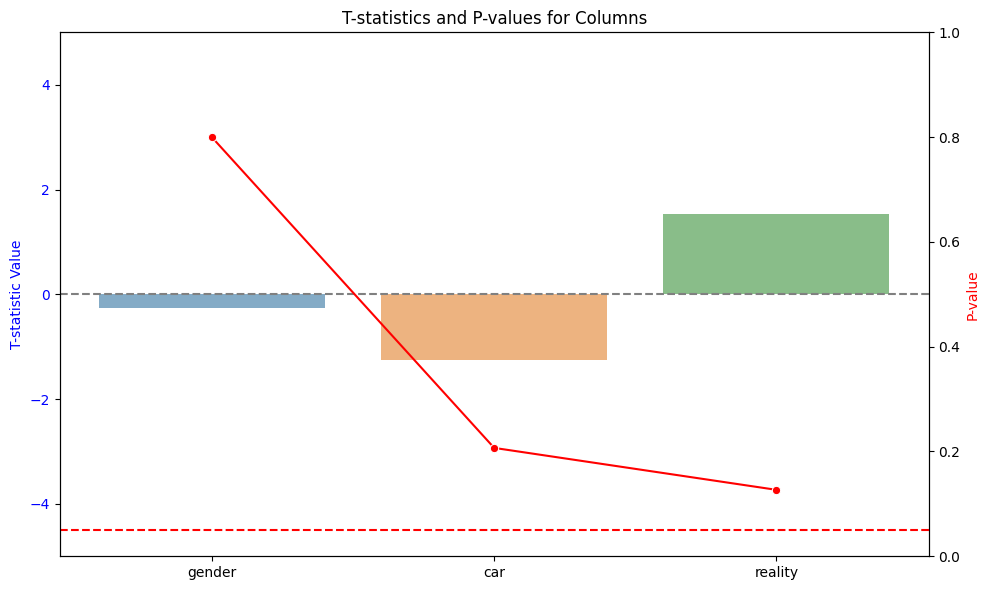

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# t-검정을 수행할 컬럼 설정
columns_to_test = ['gender', 'car', 'reality']

# t-통계량과 p-값을 저장할 리스트 초기화
t_stats = []
p_values = []

# 각 컬럼에 대한 t-검정 수행
for col in columns_to_test:
    unique_values = train[col].unique()

    # 결과 시각화
    if len(unique_values) == 2:
        group_A = train[train[col] == unique_values[0]]['credit']
        group_B = train[train[col] == unique_values[1]]['credit']

        t_stat, p_value, _ = sm.ttest_ind(group_A, group_B)
        t_stats.append(t_stat)
        p_values.append(p_value)
    else:
        t_stats.append(None)
        p_values.append(None)

# t-통계량과 p-값을 하나의 그래프에 결합하여 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# t-통계량 표시
sns.barplot(x=columns_to_test, y=t_stats, ax=ax1, alpha=0.6)
ax1.axhline(0, color='gray', linestyle='--')  # y=0에 수평선 추가 (참조용)
ax1.set_title("T-statistics and P-values for Columns")
ax1.set_ylabel("T-statistic Value", color="blue")
ax1.set_ylim([-5, 5])  # 시각화를 위해 y축 범위 설정
ax1.tick_params(axis='y', labelcolor="blue")

# p-값을 표시하기 위한 두 번째 y축 생성
ax2 = ax1.twinx()
sns.lineplot(x=columns_to_test, y=p_values, ax=ax2, color="red", marker="o")
ax2.axhline(0.05, color='red', linestyle='--')  # 보통의 유의 수준인 y=0.05에 수평선 추가 (참조용)
ax2.set_ylabel("P-value", color="red")
ax2.set_ylim([0, 1])  # p-값의 y축 범위는 0과 1 사이로 설정

plt.tight_layout()
plt.show()

세 변수에서 p-value가 0.05보다 크므로, 귀무 가설을 기각할 수 없습니다. (하단의 붉은색 선이 0.05에 해당하는 선입니다!)    
이는 성별, 차량 소유 여부, 부동산 보유 여부와 신용도 사이에 통계적으로 유의미한 관계가 없다는 것을 의미합니다.

### 4. 카이제곱 검정

**범주형 변수**들 간의 관계는 **카이제곱 검정**을 통해 파악할 수 있습니다.     
이것은 마치 두 사람이 같은 팀에 속해 있는지, 혹은 경쟁하는 다른 팀에 속해 있는지를 확인하는 것과 같습니다.     
만약 두 변수가 독립적이라면, 한 변수의 변화는 다른 변수에 아무런 영향을 미치지 않을 것입니다.     
그러나 만약 두 변수가 서로 관련이 있다면, 한 변수의 변화는 다른 변수에도 영향을 미칠 것입니다.

sm.stats.proportions_ztest() 함수로 카이제곱 검정을 수행해볼까요?

In [ ]:
from statsmodels.stats.contingency_tables import Table

# 카이제곱 검정을 수행할 컬럼을 설정합니다.
variables_to_compare = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email']
chi2_results_multi = []

# 2개 이상을 가지는 범주에 대한 카이제곱 검정을 수행합니다.
for variable in variables_to_compare:
    contingency_table = pd.crosstab(train[variable], train['credit'])

    # Table 클래스로 카이제곱 검정을 수행합니다.
    table = Table(contingency_table)
    result = table.test_nominal_association()
    chi2_stat = result.statistic
    p_value = result.pvalue

    # 결과를 저장합니다.
    chi2_results_multi.append({
        "variable": variable,
        "chi2_statistic": chi2_stat,
        "p_value": p_value
    })

chi2_results_multi_df = pd.DataFrame(chi2_results_multi)
chi2_results_multi_df

,variable,chi2_statistic,p_value
0,gender,0.753743,0.686004
1,car,9.396436,0.009111
2,reality,11.231612,0.003640
3,work_phone,0.363705,0.833724
4,phone,8.035167,0.017996
5,email,6.065864,0.048174


각 변수와 신용도('credit') 사이의 카이제곱 검정을 수행한 결과는 다음과 같습니다:

- 성별('gender'):

> 카이제곱 통계량: 0.7537     
p-value: 0.6860    
p-value가 0.05보다 크므로, 성별과 신용도 사이에는 통계적으로 유의미한 관계가 없다고 볼 수 있습니다.

- 차 소유 여부('car'):

> 카이제곱 통계량: 9.3964   
p-value: 0.0091   
p-value가 0.05보다 작으므로, **차 소유 여부와 신용도 사이에는 통계적으로 유의미한 관계**가 있다고 볼 수 있습니다.

- 부동산 소유 여부('reality'):

> 카이제곱 통계량: 11.2316    
p-value: 0.0036    
p-value가 0.05보다 작으므로, **부동산 소유 여부와 신용도 사이에는 통계적으로 유의미한 관계**가 있다고 볼 수 있습니다.

- 업무용 전화 소유 여부('work_phone'):

> 카이제곱 통계량: 0.3637    
p-value: 0.8337    
p-value가 0.05보다 크므로, 업무용 전화 소유 여부와 신용도 사이에는 통계적으로 유의미한 관계가 없다고 볼 수 있습니다.

- 전화 소유 여부('phone'):

> 카이제곱 통계량: 8.0352   
p-value: 0.0180    
p-value가 0.05보다 작으므로, **전화 소유 여부와 신용도 사이에는 통계적으로 유의미한 관계**가 있다고 볼 수 있습니다.

- 이메일 소유 여부('email'):

> 카이제곱 통계량: 6.0659    
p-value: 0.0482    
p-value가 0.05보다 작으므로, **이메일 소유 여부와 신용도 사이에는 통계적으로 유의미한 관계**가 있다고 볼 수 있습니다.

이 결과들은 각 변수의 값에 따라 신용도가 어떻게 변하는지를 검정한 결과입니다. p-value가 0.05보다 작은 경우, 해당 변수와 신용도 사이에는 통계적으로 유의미한 관계가 있다고 볼 수 있습니다.




<img src='http://drive.google.com/uc?export=view&id=1h6SRzLLU8X50E7srv6IhyoWlJXPB-lax' /><br>
다음 스테이지는 Stage 4. EDA 기반 시각화 및 가공 - WHERE 어디서 연체 정도가 잘 나타날까? 입니다!    
변수별 특징을 시각화하고, 다양한 전처리와 모델링을 수행할 예정이에요~    
그럼, 다음 스테이지로 가볼까요? 😎